TP3 - Angela Siles


In [103]:
import numpy as np
import glob
import cv2 as cv
import matplotlib.pyplot as plt
import imutils
import scipy.stats as st
from PIL import Image

In [104]:
def escalado(ruta_imagen): 

    # Leer la imagen de patrón desde la ruta proporcionada en modo escala de grises
    patron = cv2.imread(ruta_imagen, 0)

    # Inicializar listas vacías para almacenar imágenes con operación bitwise e imágenes redimensionadas
    lista_imagenes_bitwise = []
    lista_imagenes_redimensionadas = []

    # Multi-escala
    for escala in np.linspace(0.1, 1.0, 10)[::-1]:  # Iterar a través de diferentes escalas
        # Redimensionar la imagen de patrón manteniendo la relación de aspecto
        imagen_redimensionada = imutils.resize(
            patron, width=int(patron.shape[1] * escala))
        r = patron.shape[1] / float(imagen_redimensionada.shape[1])

        # Aplicar la operación bitwise NOT a la imagen redimensionada
        imagen_bitwise = cv2.bitwise_not(imagen_redimensionada)

        # Agregar la imagen con operación bitwise y la imagen redimensionada a sus respectivas listas
        lista_imagenes_bitwise.append(imagen_bitwise)
        lista_imagenes_redimensionadas.append(imagen_redimensionada)

    # Devolver las listas de imágenes con operación bitwise e imágenes redimensionadas
    return lista_imagenes_bitwise, lista_imagenes_redimensionadas


ruta_imagen_pattern = 'template/pattern.png'  # Definir la ruta de la imagen de patrón
img_bitwise_list, img_resized_list = escalado(ruta_imagen_pattern)  # Llamar a la función scale_img


In [105]:
def read_img(ruta_carpeta):  # Definir una función llamada leer_imagenes que toma la ruta de la carpeta como argumento
    
    ruta_carpeta_imagenes = ruta_carpeta  # Definir la ruta de la carpeta de imágenes
    extensiones = ['png', 'jpg']  # Definir las extensiones de archivo permitidas
    nombres_archivos = []  # Crear una lista vacía para almacenar nombres de archivos
    imagenes_grises = []  # Crear una lista vacía para almacenar imágenes en escala de grises
    imagenes_color = []  # Crear una lista vacía para almacenar imágenes en color

    # Obtener la lista de nombres de archivos con las extensiones permitidas en la carpeta
    [nombres_archivos.extend(glob.glob(ruta_carpeta_imagenes + '*.' + ext)) for ext in extensiones]

    # Leer las imágenes y almacenarlas en la lista imagenes
    imagenes = [cv2.imread(archivo) for archivo in nombres_archivos]

    # Procesar cada imagen en la lista imagenes
    for imagen in imagenes:
        # Convertir la imagen a formato RGB
        imagen_color = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        
        # Convertir la imagen a escala de grises
        imagen_gris = cv2.cvtColor(imagen_color, cv2.COLOR_BGR2GRAY)
        imagenes_grises.append(imagen_gris)
        
        # Agregar imágenes a las listas respectivas
        imagenes_color.append(imagen_color)

    # Devolver las listas de imágenes procesadas
    return  imagenes_grises, imagenes_color

ruta_carpeta_imagenes = 'images/'  
image_gray, imgs_color = read_img(ruta_carpeta_imagenes) 


In [106]:
def detection_logo(path):
     # Leer imágenes procesadas 
    imagenes_grises, imagenes_color = read_img(path)
    
    # Inicializar listas para almacenar imágenes redimensionadas del patrón
    patrones_redimensionados_1 = []
    patrones_redimensionados_2 = []
    
    # Leer la imagen de patrón en escala de grises
    patron = cv2.imread('template/pattern.png', 0)
    
    found = None
    
    # Iterar a través de índices i y j usando la función zip
    for i, j in zip(range(len(imagenes_grises)), range(len(imagenes_color))):
        
        # Multi-escala
        for escala in np.linspace(0.5, 3.5, 90)[::-1]:  # Iterar a través de diferentes escalas
            # Redimensionar la imagen de patrón manteniendo la relación de aspecto
            patron_redimensionado = imutils.resize(
                patron, width=int(patron.shape[1] * escala))
            
            # Agregar el patrón redimensionado a la lista correspondiente
            if patron_redimensionado.shape[1] > imagenes_grises[i].shape[1]:
                continue
            
            if patron_redimensionado.shape[1] >= 1200 and patron_redimensionado.shape[0] >= 500:
                patrones_redimensionados_1.append(patron_redimensionado)
            elif patron_redimensionado.shape[1] >= 400 and patron_redimensionado.shape[0] >= 200:
                patrones_redimensionados_2.append(patron_redimensionado)
        
        if i == 3:
            patron_redimensionado = patrones_redimensionados_2[14]
        elif i == 6:
            patron_redimensionado = patrones_redimensionados_1[3]

        ancho_patron_redimensionado, alto_patron_redimensionado = patron_redimensionado.shape[::-1]

        # Detección de bordes para la imagen de patrón
        imagen_canny_patron = cv2.Canny(patron_redimensionado, threshold1=100, threshold2=200)

        # Detección de bordes para la imagen donde se detectará el logotipo
        img_canny = cv2.Canny(imagenes_grises[i], threshold1=200, threshold2=700)

        metodo = 'cv.TM_CCOEFF_NORMED'

        # Comparación de patrón entre la imagen de patrón y la imagen donde se detectará el logotipo
        img_coincidencia = cv2.matchTemplate(
            img_canny, imagen_canny_patron, eval(metodo))
        (minVal, maxVl, minLoc, maxLoc) = cv2.minMaxLoc(img_coincidencia)

        # Ubicación donde se encontró la coincidencia
        esquina_superior = maxLoc

        esquina_inferior_derecha = (esquina_superior[0] + ancho_patron_redimensionado,
                                    (esquina_superior[1] + alto_patron_redimensionado))

        # Dibujar un rectángulo en la imagen de color
        cv2.rectangle(imagenes_color[j], esquina_superior, esquina_inferior_derecha, (0, 0, 255), 2)

        # Mostrar resultados de la comparación
        plt.subplot(121), plt.imshow(img_coincidencia, cmap='gray')
        plt.title('Resultado de la Comparación'), plt.xticks([]), plt.yticks([])

        # Mostrar la imagen original con el rectángulo
        plt.subplot(122), plt.imshow(imagenes_color[j])
        plt.title('Punto Detectado'), plt.xticks([]), plt.yticks([])

        plt.suptitle(metodo)
        plt.show()

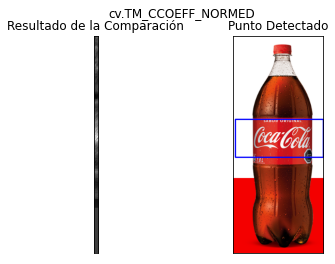

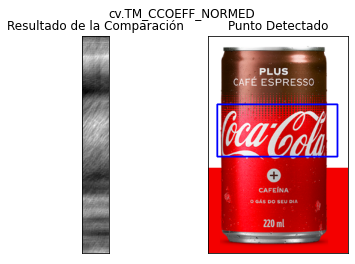

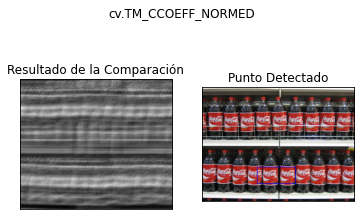

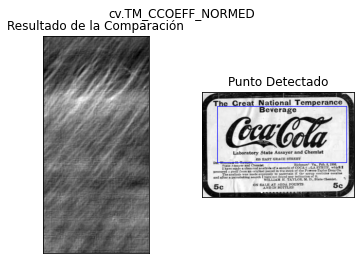

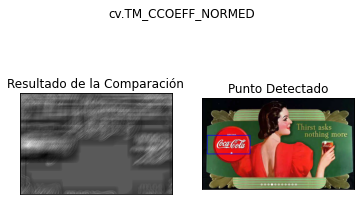

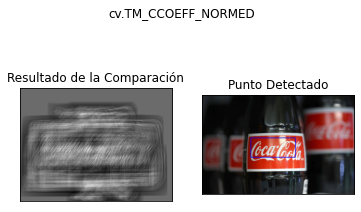

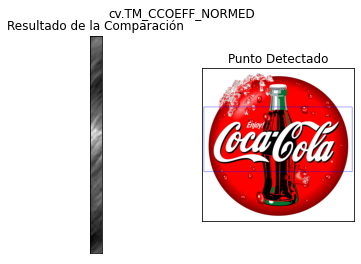

In [107]:
#logo_detection
detection_logo('images/')

In [108]:
def detection_multi(ruta_img):
    # Leer la imagen de entrada
    img_entrada = cv2.imread(ruta_img)
    # Fijar un umbral de "coincidencia"
    umbral = 0.629
    # Convertir la imagen a formato RGB
    img_coca_cola = cv2.cvtColor(img_entrada, cv2.COLOR_BGR2RGB)
    
    # Convertir la imagen a escala de grises
    img_coca_cola_gris = cv2.cvtColor(img_coca_cola, cv2.COLOR_BGR2GRAY)
    
    # Obtener las imágenes redimensionadas del patrón utilizando la función escala_img
    imgs_patron_bitwise, imgs_patron_redimensionados = scale_img("template/pattern.png")
    
    # Seleccionar la imagen del patrón redimensionado
    img_patron = imgs_patron_bitwise[8]
    
    # Método de comparación de plantilla
    metodo = 'cv.TM_CCORR_NORMED'

    ancho, alto = img_patron.shape[::-1]
    
    # Realizar la comparación de plantilla
    resultado = cv2.matchTemplate(
        img_coca_cola_gris, img_patron, eval(metodo))
    
    # Encontrar ubicaciones donde la coincidencia supera el umbral
    ubicaciones = np.where(resultado >= umbral)
    
    # Dibujar rectángulos en la imagen de entrada en las ubicaciones de coincidencia
    for punto in zip(*ubicaciones[::-1]):
        cv2.rectangle(img_coca_cola, punto, (punto[0] + ancho, punto[1] + alto), (0, 0, 255), 2)

    # Mostrar las imágenes de patrón y resultado
    plt.figure(figsize=(10, 10))
    plt.subplot(121)
    plt.imshow(img_patron, cmap='gray')
    plt.title('Patrón')

    plt.subplot(122)
    plt.imshow(img_coca_cola)
    plt.title('Resultado')

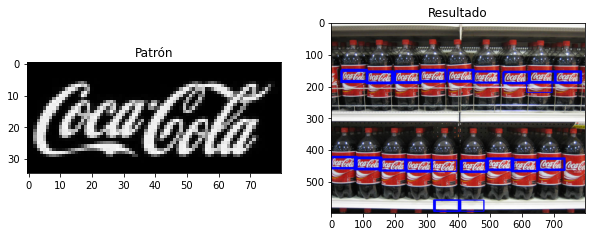

In [109]:
image_path = 'images/coca_multi.png'
detection_multi(image_path)

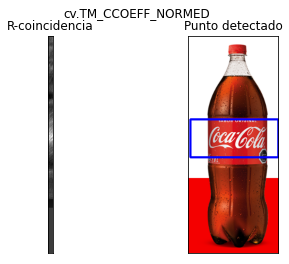

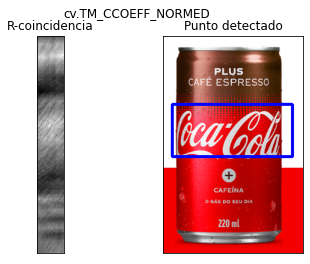

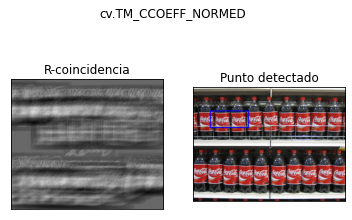

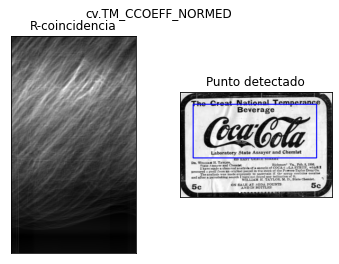

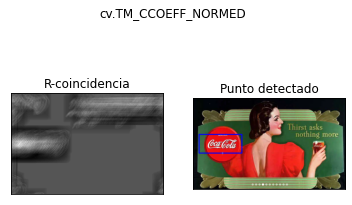

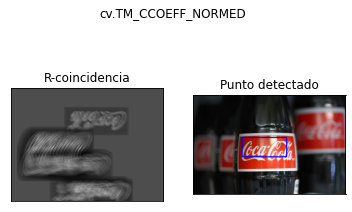

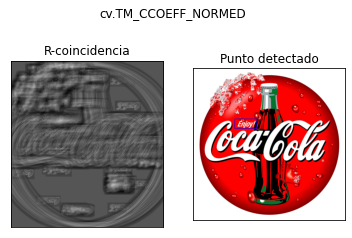

In [110]:
def detection(path): # Leer las imágenes y generar imágenes procesadas
    imagenes_gris, imagenes_color = read_img(path)
    CI = 0.75
    # Inicializar listas para almacenar valores máximos y patrones redimensionados
    valores_maximos = []
    patrones_redimensionados = []
    
    # Leer el patrón
    patron = cv2.imread('template/pattern.png', 0)

    found = None
    for i, j in zip(range(len(imagenes_gris)), range(len(imagenes_color))):
        
        # Multi-escalado
        for escala in np.linspace(0.5, 4, 90)[::-1]:
            patron_redimensionado = imutils.resize(
                patron, width=int(patron.shape[1] * escala))
            
            # Verificar si el patrón redimensionado es adecuado para la imagen
            if patron_redimensionado.shape[1] > imagenes_gris[i].shape[1]:
                continue

            if patron_redimensionado.shape[1] >= 400 and patron_redimensionado.shape[0] >= 200:
                patrones_redimensionados.append(patron_redimensionado)

        # Seleccionar un patrón redimensionado específico
        if i == 3:
            patron_redimensionado = patrones_redimensionados[14]

        ancho_patron_redimensionado, alto_patron_redimensionado = patron_redimensionado.shape[::-1]

        # Detección de bordes para la imagen del patrón y la imagen de entrada
        bordes_patron = cv2.Canny(patron_redimensionado, threshold1=120, threshold2=430)
        bordes_imagen = cv2.Canny(imagenes_gris[i], threshold1=100, threshold2=900)

        metodo = 'cv.TM_CCOEFF_NORMED'
        
        # Realizar la comparación de plantillas
        coincidencia_patron = cv2.matchTemplate(bordes_imagen, bordes_patron, eval(metodo))
        (minimoValor, maximoValor, minLoc, maxLoc) = cv2.minMaxLoc(coincidencia_patron)

        valores_maximos.append(maximoValor)
        
        # Calcular el umbral basado en el valor máximo y el coeficiente de confianza (CI)
        umbral = 0.063 * CI
        if valores_maximos[i] >= umbral:
            umbral = valores_maximos[i]
        ubicaciones = np.where(coincidencia_patron >= umbral)
        
        # Dibujar rectángulos en la imagen de entrada en las ubicaciones de coincidencia
        for pt in zip(*ubicaciones[::-1]):
            cv2.rectangle(imagenes_color[j], pt, (pt[0] + ancho_patron_redimensionado,pt[1] + alto_patron_redimensionado), (0, 0, 255), 4)

        # Mostrar los resultados de la comparación
        plt.subplot(121), plt.imshow(coincidencia_patron, cmap='gray')
        plt.title('R-coincidencia'), plt.xticks([]), plt.yticks([])

        # Mostrar la imagen original con el cuadro delimitador
        plt.subplot(122), plt.imshow(imagenes_color[j])
        plt.title('Punto detectado'), plt.xticks([]), plt.yticks([])

        plt.suptitle(metodo)
        plt.show()

detection('images/')